In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the data

In [5]:
df = pd.read_csv('height-weight.csv')

In [6]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


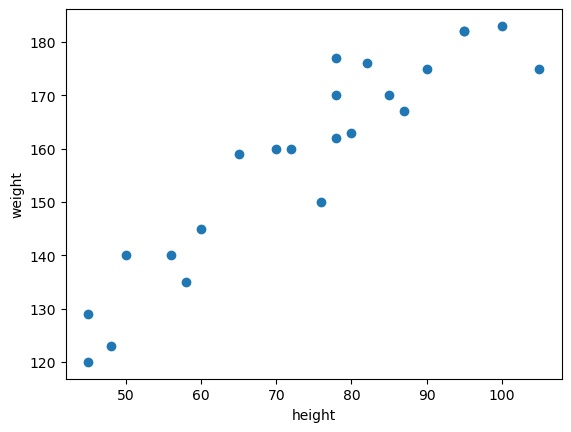

In [9]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [13]:
#devide the data into X and y
x = df[['Height']] #independent feature
y= df["Weight"] #dependent feature

In [11]:
x

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [12]:
y

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [14]:
#trai test split
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [21]:
X_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [22]:
X_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140


In [23]:
y_train

10     82
4      70
2      48
18     76
6      80
7      90
1      58
14     85
0      45
15     78
22     72
21     56
9      78
8      95
12    105
11     95
5      78
Name: Weight, dtype: int64

In [24]:
y_test

20     45
17     65
3      60
13    100
19     87
16     50
Name: Weight, dtype: int64

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [26]:
df.shape

(23, 2)

In [27]:
#Scaling>> standardization >> fit_transform >>tain, transform>>test

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler

StandardScaler()

In [31]:
X_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [33]:
#Always perform scaling after train test split
#y/target variable should not be scaled
#avoid scaling categorical features
X_train = scaler.fit_transform(X_train) #for train data use fit_transform
X_test = scaler.transform(X_test)#for test use only transform as it is representative of unknown data>> 

In [34]:
X_train

array([[ 0.83312597],
       [ 0.        ],
       [-1.92660381],
       [-0.52070373],
       [ 0.15621112],
       [ 0.7810556 ],
       [-1.30175933],
       [ 0.52070373],
       [-2.08281493],
       [ 0.88519634],
       [ 0.        ],
       [-1.04140746],
       [ 0.52070373],
       [ 1.14554821],
       [ 0.7810556 ],
       [ 1.14554821],
       [ 0.10414075]])

In [35]:
X_test


array([[-1.61418157],
       [-0.05207037],
       [-0.7810556 ],
       [ 1.19761858],
       [ 0.36449261],
       [-1.04140746]])

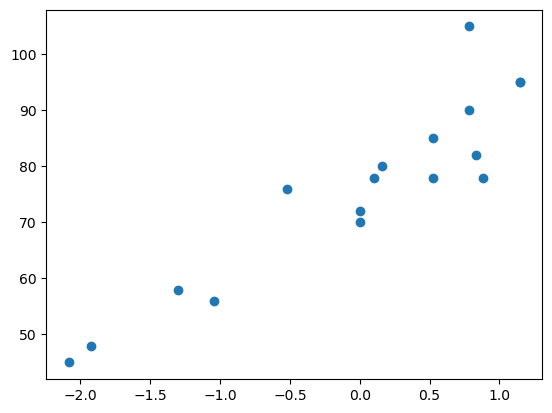

In [36]:
#scaling is optional >> why? it doesn't affect the distribution of data
plt.scatter(X_train,y_train)

In [37]:
#model training
from sklearn.linear_model import LinearRegression 


#linear regression parameters:
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy__X >> copy the original X_train and then build the model, dont modify the original data,by default>>true
#n_jobs >> processor you want to use
#positive>> you want all of your coefficient to be positive


#After building the model, you have attributes of the mode
#coef
#intercept

In [38]:
regressor = LinearRegression()

In [39]:
regressor

LinearRegression()

In [40]:
#training of the model
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
print("The slope or coef of model is", regressor.coef_)
print("The intercept of the model is", regressor.intercept_)

The slope or coef of model is [14.89518969]
The intercept of the model is 75.94117647058823


#prediction on train data
#predicted height output = intercept + coef_(weights),y_pred_train = 160.0+17.74*(X_train)


#prediction on test data
#predicted height output = intercept + coef_(weights),y_pred_test = 160.0 + 17.74*(X_test)


In [42]:
#prediction of train data
regressor.predict(X_train)

array([88.35074585, 75.94117647, 47.24404728, 68.18519561, 78.26797073,
       87.57514776, 56.55122432, 83.69715733, 44.91725303, 89.12634393,
       75.94117647, 60.42921475, 83.69715733, 93.00433437, 87.57514776,
       93.00433437, 77.49237264])

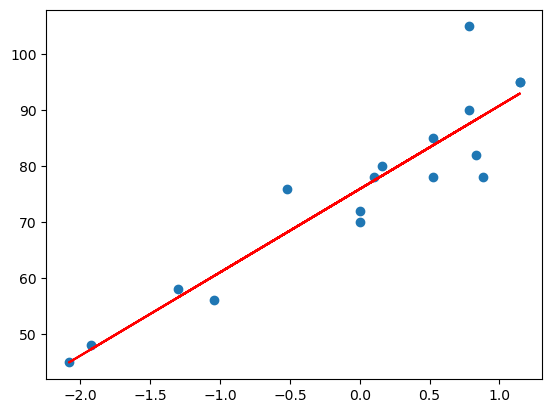

In [43]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [44]:
y_pred_test = regressor.predict(X_test)

In [48]:
y_pred_test, y_test #real and predicted data

(array([51.8976358 , 75.16557838, 64.30720518, 93.77993245, 81.37036307,
        60.42921475]),
 20     45
 17     65
 3      60
 13    100
 19     87
 16     50
 Name: Weight, dtype: int64)

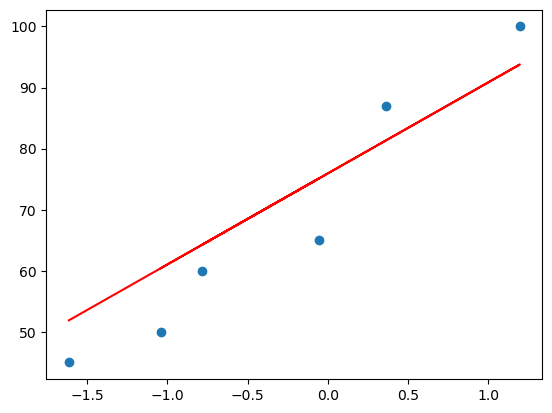

In [46]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [47]:
#performace matrics

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
mse = mean_squared_error(y_test,y_pred_test)

In [53]:
mse

58.103158746170266

In [54]:
mae = mean_absolute_error(y_test,y_pred_test)

In [55]:
mae

7.274889764518246

In [58]:
rmse = np.sqrt(mse)

In [59]:
rmse

2.7608952896745214

In [60]:
#Rsquare =  1-SSR/SST

In [61]:
from sklearn.metrics import r2_score

In [62]:
score = r2_score(y_test,y_pred_test)

In [63]:
score

0.8491371283907587

In [64]:
#adjusted r square
#R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] #n is no of obs, k is no predictor varaiables

In [65]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] -1)
#adjusted r square will be always lesser than rsquare

0.8114214104884484

In [66]:
#to get no of columns
X_test.shape[1]

1

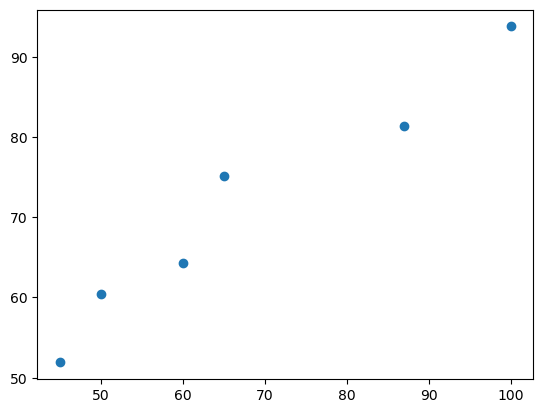

In [68]:
#assumption
#X-y should have linear relationship
# Observation should have no relation
# error should have constant variance
#error should be normally distribute
plt.scatter(y_test, y_pred_test)

In [69]:
#residual/error
error = y_test - y_pred_test
error

20    -6.897636
17   -10.165578
3     -4.307205
13     6.220068
19     5.629637
16   -10.429215
Name: Weight, dtype: float64

In [70]:
import seaborn as sns

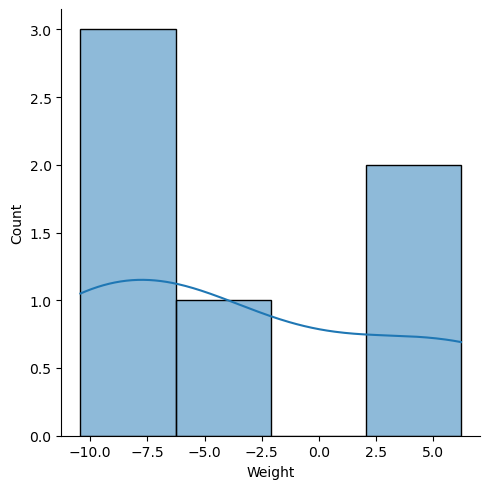

In [71]:
sns.displot(error,kde = True)

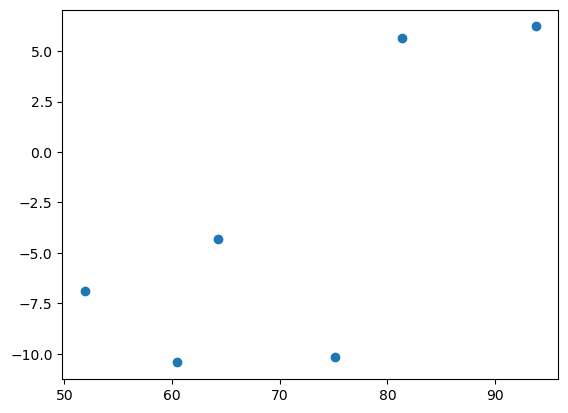

In [72]:
# error should have constant variance
plt.scatter(y_pred_test,error)